Code to recreate the NNapex Peacock code from Matlab

In [1]:
import sys
!{sys.executable} -m pip install torch torchvision scipy matplotlib | grep -v 'already satisfied'

In [2]:
import pathlib
from simcoder.similarity import load_mf_encodings

allData = load_mf_encodings(pathlib.Path("/Volumes/Data/mf_resnet50/")) # load resnet 50 encodings

In [3]:

from scipy.io import loadmat
import numpy as np

def load_mf_softmax():
    basepath = pathlib.Path("/Volumes/Data/mf_softmax/")

    paths = basepath.glob("*.mat")
    paths = sorted(paths, key=lambda p: int(p.stem))
    encodings = [loadmat(p)["probVecs"] for p in paths]
    encodings = np.concatenate(encodings)
    return encodings



In [4]:
smData = load_mf_softmax()

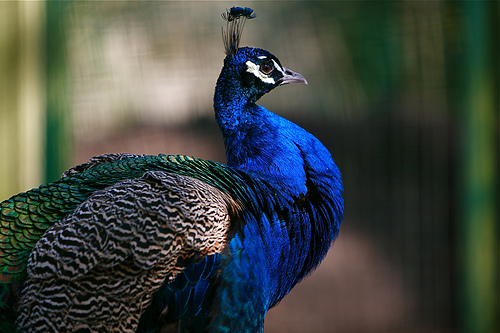

In [5]:
# Get the peacock at index 

from simcoder.similarity import get_mf_image

q0 = 101102 # a peacock

get_mf_image(q0)

In [6]:
from simcoder.similarity import euclid as euclid

def getDists(query_index,allData):
    '''Return the distances from the query to allData'''
    '''Returns an array same dimension as allData of scalars'''
    mf_query_data = allData[query_index]
    distances = euclid(mf_query_data, allData)
    return distances

In [7]:
from matplotlib import pyplot as plt

def imShow( image ):
    # plt.title(Image title")
    #plt.xlabel("X pixel scaling")
    # plt.ylabel("Y pixels scaling")

    fig = plt.figure(figsize = (1,1)) # in inches!
    plt.axis('off')
    plt.imshow(image) # figsize=(640/80,640/80), dpi=80)
    plt.show()

In [8]:
dists = getDists(q0,allData)
closest_indices = np.argsort(dists) # the closest images to the query

poly_query_indexes = closest_indices[0:6] # These are the indices we will use for the poly query

best_100_for_single = closest_indices[0:100]

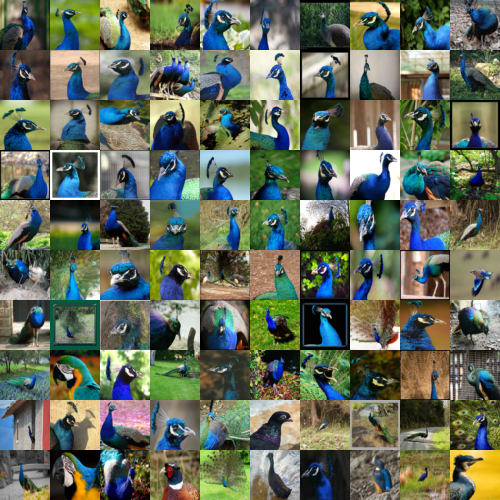

In [20]:
# These are the best images best on lowest average distance from the queries

from simcoder.similarity import make_mf_image_grid

make_mf_image_grid(best_100_for_single,10,10,50,50)

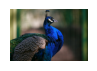

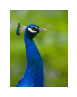

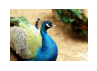

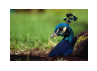

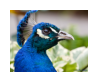

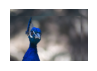

In [10]:


for i in range(0,6): # 0 is the original image
    imShow(get_mf_image(poly_query_indexes[i]))

In [11]:
# Fetch the data and whole-set distances for the extra query objects
# fc6_poly_queries is the FC6 data for the queries we have chosen - not needed
# poly_query_distances is the distances from the queries to the all data 1000000,6

num_queries = len(poly_query_indexes)
# fc6_poly_queries = allData[poly_query_indexes]

poly_query_distances = np.zeros((num_queries,1000*1000))
for i in range(num_queries):
    poly_query_distances[i] = getDists(poly_query_indexes[i],allData) 




In [12]:
row_sums = np.sum(poly_query_distances,axis=0)
lowest_sum_indices = np.argsort(row_sums)


# for i in range(10):
#     ii = lowest_sum_indices[i]
#     print( ii, row_sums[ii] )

best_100_average_indices = lowest_sum_indices[:100]


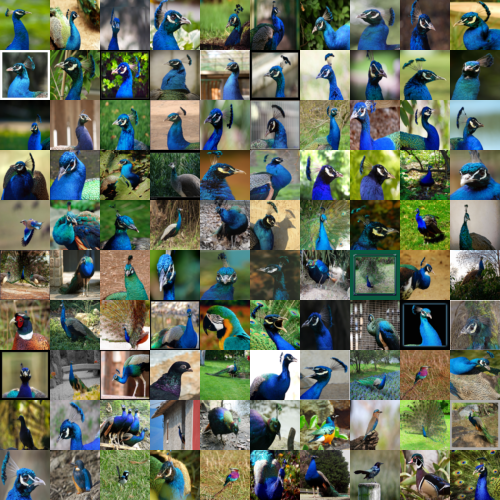

In [13]:
# These are the best images best on lowest average distance from the queries

from simcoder.similarity import make_mf_image_grid

make_mf_image_grid(best_100_average_indices,10,10,50,50)


In [14]:
# What is the catgegory for Peacock?

peacock_category = 84


In [15]:
# First load the sotmax encodings of the data

softmax_encodings = load_mf_softmax()
softmax_encodings.shape



(1000000, 1000)

In [21]:
from simcoder.count_cats import countNumberinCatGTThresh 
from simcoder.count_cats import countNumberInResultsInCat

# Quick santity check
countNumberinCatGTThresh(peacock_category,0.0000000000005,softmax_encodings)

# max_number_possible_peacocks = ??
countNumberinCatGTThresh( peacock_category,0.9,softmax_encodings)

247

In [22]:
# Now want to report results the total count in the category

encodings_for_best_100_single = softmax_encodings[best_100_for_single] # the alexnet encodings for the best 100 average singlequery images
single_peacock_totals = encodings_for_best_100_single[:,peacock_category]
print("Total peacock sum for single query best 100: ", np.sum(single_peacock_totals))


encodings_for_best_100_average = softmax_encodings[best_100_average_indices] # the alexnet encodings for the best 100 average polyquery images
average_peacock_totals = encodings_for_best_100_average[:,peacock_category]
print("Total peacock sum for poly query best 100: ", np.sum(average_peacock_totals))

res = countNumberInResultsInCat(peacock_category,0.9,best_100_for_single,softmax_encodings)
print("Total with thresh better than 0.9 single query : ", res)

res = countNumberInResultsInCat(peacock_category,0.9,best_100_average_indices,softmax_encodings)
print("Total with thresh better than 0.9 poly query : ", res)


Total peacock sum for single query best 100:  84.09667855453304
Total peacock sum for poly query best 100:  81.67148175479066
Total with thresh better than 0.9 single query :  77
Total with thresh better than 0.9 poly query :  75
